<a href="https://colab.research.google.com/github/massaoHigaskino/DSWP/blob/project%2Fdanielle_upstream/dswp_grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CRISP-DM PROCESS**

#**1BU - BUSINESS UNDERSTANDING**

> O que se deseja alcançar a partir de uma perspectiva de negócios.

#**2DU - DATA UNDERSTANDING**

> Coleta e exploração dos dados. Exploração do dataframe, descobrir relações e descrever os dados em geral. Utilize-se das técnicas de Data Visualization para detectar relações relevantes entre as variáveis, desequilíbrios de classes e identificar variáveis mais importantes.

###Criar um dataframe a partir do ficheiro

In [0]:
# Carrega a library Pandas
import pandas as pd
import numpy as np

In [0]:
df_50k = pd.read_csv('https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/adult.data')
print(f'Ficheiro com {df_50k.shape[0]} linhas e {df_50k.shape[1]} colunas') 

Ficheiro com 32560 linhas e 15 colunas


In [0]:
#Detecção de que o ficheiro não tem header
df_50k.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [0]:
#Lista para o header do ficheiro
l_column = ['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'flag_50k'
          ]
l_column

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'flag_50k']

In [0]:
#Adição de header ao ficheiro
df_50k = pd.read_csv('https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/adult.data'
                    ,names = l_column)

In [0]:
df_50k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
flag_50k          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [0]:
df_50k.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Dicionário dos dados**   
*   Age: idade da pessoa
*   workclass: classificação do cargo profissional
*   fnlwgt (final weight): ?
*   education: grau de escolaridade
*   education-num: ?
*   marital-status: estado civil
*   occupation: cargo profissional
*   relationship: tipo de relacionamento
*   race: raça
*   sex: sexo
*   capital-gain: ?
*   capital-loss: ?
*   hours-per-week: horas por semana trabalhadas?
*   native-country: país de nascimento
*   flag_50k: indicativo se ganha menos (<=50k) ou mais (>50k) que 50.000 dinheiros





In [0]:
#Colunas do DataFrame
df_50k.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'flag_50k'],
      dtype='object')

In [0]:
df_50k.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
flag_50k          object
dtype: object

In [0]:
#Valores distintos de WorkClass
df_50k['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [0]:
#Valores distintos de Education
df_50k['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [0]:
#Valores distintos de marital-status
df_50k['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [0]:
#Valores distintos de occupation
df_50k['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [0]:
#Valores distintos de relationship
df_50k['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [0]:
#Valores distintos de race
df_50k['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [0]:
#Valores distintos de sex
df_50k['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
#Valores distintos de native-country
df_50k['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [0]:
#Valores distintos de flag_50k
df_50k['flag_50k'].value_counts()

 <=50K    24720
 >50K      7841
Name: flag_50k, dtype: int64

#**3DP - DATA PREPARATION**

> Coletar, preparar, transformar e limpar dados: remover duplicatas, corrigir erros, lidar com Missing Values, normalização, conversões de tipo de dados e etc.

*   **3DP_Feature Engineering**: derivar variaveis
*   **3DP_Missing Values Handling**: identificar e tratar os Missing Values
*   **3DP_Outliers Handling**: identificar e tratar os Outlier
*   **3DP_Data Transformation**: colocar as variáveis numa mesma escala (RobustScaler?)










In [0]:
#Lista com os nomes da colunas por tipo de dados
df_50k.select_dtypes(include=['float','number']).columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [0]:
#criar nova coluna?
#df_50k['ind_50k'] = df_50k['flag_50k'].apply(lambda x: 0 if x == '<=50K' else 1)

#**4M - MODELING**

> Aplicar algoritmos (*Supervised* vs *Unsupervised Learning*).

#**5MSE - MODEL SELECTION AND EVALUATE**

> Aplicação das melhores métricas para avaliar o acurácia dos modelos de ML.

##imports

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from time import time
from operator import itemgetter
from scipy.stats import randint

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

np.set_printoptions(suppress=True)

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

##Método da matriz de confusão

In [0]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=False,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize= (8,8),
                          cmap='Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

##Parametrização

In [0]:
i_CV= 10 # Número de Cross-Validations
i_Seed= 20111974 # semente por questões de reproducibilidade
f_Test_Size= 0.3

##Carregamento dos dados (CSV pré processados)

Massao: fiz uma preparação básica dos dados com PostgreSQL, mas todas as transformações (basicamente adição de dummy columns) podem ser facilmente feitas via Pandas.

In [40]:
X_train = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Execution/adult_50k/datascience_adult_50k_v_t1_adult_data_dataset.csv', index_col= 'id');
X_train.head()

,age,workclass_fg,workclass_lg,workclass_nw,workclass_p,workclass_sei,workclass_seni,workclass_g,workclass_wp,fnlwgt,education_num,marital_status_d,marital_status_mas,marital_status_mcs,marital_status_msa,marital_status_nm,marital_status_s,marital_status_w,occupation_ac,occupation_af,occupation_cr,occupation_em,occupation_fs,occupation_hc,occupation_moi,occupation_os,occupation_phs,occupation_ps,occupation_pts,occupation_s,occupation_ts,occupation_tm,relationship_h,relationship_oc,relationship_w,relationship_nif,relationship_u,relationship_or,race_b,race_api,...,native_country_02,native_country_03,native_country_04,native_country_05,native_country_06,native_country_07,native_country_08,native_country_09,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,19,0,0,0,0,0,0,0,0,117201,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,41,0,1,0,0,0,0,0,0,22155,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,39,0,0,0,0,0,0,0,0,179352,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,46,0,0,0,1,0,0,0,0,109089,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,51,0,0,0,1,0,0,0,0,249741,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
y_train = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Execution/adult_50k/datascience_adult_50k_v_t1_adult_data_target.csv', index_col= 'id');
y_train.head()

,target
id,
1,0
2,0
3,0
4,0
5,0


In [38]:
X_test = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Execution/adult_50k/datascience_adult_50k_v_t1_adult_test_dataset.csv', index_col= 'id');
X_test.head()

,age,workclass_fg,workclass_lg,workclass_nw,workclass_p,workclass_sei,workclass_seni,workclass_g,workclass_wp,fnlwgt,education_num,marital_status_d,marital_status_mas,marital_status_mcs,marital_status_msa,marital_status_nm,marital_status_s,marital_status_w,occupation_ac,occupation_af,occupation_cr,occupation_em,occupation_fs,occupation_hc,occupation_moi,occupation_os,occupation_phs,occupation_ps,occupation_pts,occupation_s,occupation_ts,occupation_tm,relationship_h,relationship_oc,relationship_w,relationship_nif,relationship_u,relationship_or,race_b,race_api,...,native_country_02,native_country_03,native_country_04,native_country_05,native_country_06,native_country_07,native_country_08,native_country_09,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22,0,0,0,0,0,0,0,0,213291,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,19,0,0,0,0,0,0,0,0,47235,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,73,0,0,0,1,0,0,0,0,113446,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,57,0,0,0,0,0,0,0,0,274680,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,28,0,0,0,1,0,0,0,0,173858,9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
y_test = pd.read_csv('https://raw.githubusercontent.com/massaoHigaskino/DSWP/lectures/project/Execution/adult_50k/datascience_adult_50k_v_t1_adult_test_target.csv', index_col= 'id');
y_test.head()

,target
id,
1,0
2,0
3,1
4,0
5,0


##Random Forest

In [41]:
# Instancia...
Model_RF= RandomForestClassifier(n_estimators=100, min_samples_split= 2, max_features="auto", random_state= i_Seed)

# Treina...
Model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20111974,
                       verbose=0, warm_start=False)

In [45]:
# Cross-Validation com 10 folds
a_Scores_CV = cross_val_score(Model_RF, X_train, y_train, cv= i_CV)
print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_Scores_CV.mean(),4)}')
print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_Scores_CV.std(),4)}')

Média das Acurácias calculadas pelo CV....: 85.61999999999999
std médio das Acurácias calculadas pelo CV: 0.51


Massao: Como não foi feita nenhuma preparação dos dados, o resultado é mediocre. Pode ser melhorado.

In [46]:
print(f'Acurácias: {a_Scores_CV}')

Acurácias: [0.84801965 0.86179361 0.85841523 0.84674447 0.85995086 0.85227273
 0.85780098 0.85718673 0.86210074 0.85810811]


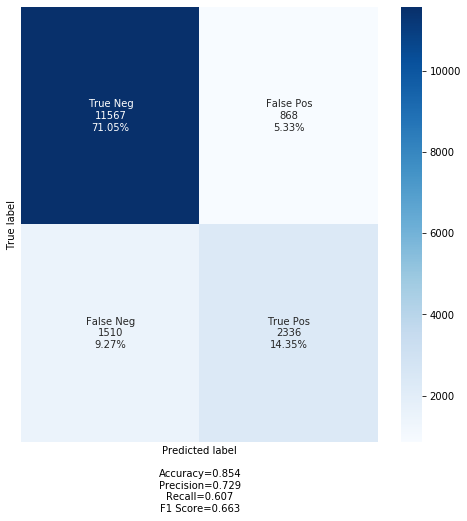

In [50]:
# Faz predições...
y_pred = Model_RF.predict(X_test)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories)

#**6D - Deployment**

> Implementação do Modelo.